# first analysis

# Part 1 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
df = pd.read_csv("data.csv")
cancer_df = df.copy()    # CREATING A COPY OF THE ORIGINAL DATAFRAME
print("Shape of the data : " , cancer_df.shape )
cancer_df.head(5 )

Shape of the data :  (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# extracting information about the features / attributes 

cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# we have only 1 categorical feature 

cancer_df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### B stands for benign while M stands for Malignant
### Total benign cells are 357 , total Malignant cells are 212 

### Little bit of preprocessing 

In [5]:
cancer_df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
# last attribute  'Unnamed : 32' contains only NAN . so we can get rid of this attribute

# we don't need id attribute also .

# we can extract output variable y , which is diagnosis  , from this data as well . 

y = cancer_df.diagnosis.values 

cancer_df.drop(["Unnamed: 32" , "id", "diagnosis"] , axis = 1 , inplace= True ) 
cancer_df.head(3) 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [7]:
X = cancer_df.values   # x is the input data

In [8]:
from sklearn.preprocessing import StandardScaler 
# standardizing the data 

In [9]:
scaler = StandardScaler()  # creating an instance of StandardScaler
scaler.fit(X )
scaled_x = scaler.transform(X) 

In [10]:
scaled_x[:2,:] # printing first two rows of the scaled_x (standardized dataset )

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

# Train test and split 

In [12]:
from sklearn.model_selection import train_test_split 
X_train , X_test , y_train , y_test = train_test_split (scaled_x , y , test_size = 0.33 , random_state = 4 )

In [13]:
classification_model = [] # stores the name of algorithm used
accuracy = []  # stores their respective accuracies

# Logistic Regression 

In [14]:
from sklearn.linear_model import LogisticRegression 
logic_model = LogisticRegression(solver = "liblinear")

In [15]:
logic_model.fit(X_train , y_train ) 
y_pred = logic_model.predict(X_test ) 

# Evaluation metrics 

In [16]:
from sklearn.metrics import  accuracy_score , confusion_matrix , precision_score , recall_score , f1_score 

In [17]:
print( "Confusion Matrix : " , confusion_matrix(y_test , y_pred ) , sep = "\n" , end = "\n\n")
print ("Accuracy : " , round(accuracy_score(y_test , y_pred )  * 100 , 2 ), sep = '\n' ) 
print ("Precision score : " , round(precision_score(y_test ,y_pred , average = 'weighted' )*100 , 2 ) ,  sep = "\n")
print ("Recall score : " , round(recall_score(y_test ,y_pred, average = 'weighted' )*100 , 2 ) ,  sep = "\n")
print ("f1 score : " , round(f1_score(y_test ,y_pred,average = 'weighted' ) * 100 ,2 ) ,  sep = "\n")


Confusion Matrix : 
[[122   6]
 [  1  59]]

Accuracy : 
96.28
Precision score : 
96.5
Recall score : 
96.28
f1 score : 
96.31


<p style="color : green ; font-size :20px ; font-family : verdana; "> Logistic Regression gives an accuracy of 
<b>96.28 </b> </p>

In [18]:
classification_model.append("Log_reg")
accuracy.append(96.28 ) 

# Decision Tree 

In [19]:
from sklearn.tree import DecisionTreeClassifier 
# using criteria as entropy

In [20]:
for depth in range(3, 7 ) : 
    tree_classifier = DecisionTreeClassifier(criterion = "entropy" , max_depth = depth  , random_state = 1 )
    tree_classifier.fit(X_train , y_train )
    y_pred = tree_classifier.predict(X_test )
    print ("Depth value : " , depth )
    print ("Accuracy : " , round(accuracy_score(y_test, y_pred ) * 100, 2 )  , end= "\n\n") 

Depth value :  3
Accuracy :  93.09

Depth value :  4
Accuracy :  92.55

Depth value :  5
Accuracy :  94.15

Depth value :  6
Accuracy :  89.36



<p style = "color : green ; font-size :20px ; fontfamily : verdana " >for depth = 5 , we are getting a max accuracy of <b>94.15</b> </p>

In [21]:
tree_classifier = DecisionTreeClassifier(criterion= "entropy" , max_depth= 5  , random_state= 1 ) 
tree_classifier.fit(X_train , y_train )
y_pred = tree_classifier.predict(X_test )
classification_model.append("Dec_tree")
accuracy.append(94.15) 


# Evaluation Metrics 

In [22]:
print ("Confusion Matrix : " , confusion_matrix(y_test , y_pred ),  sep = "\n", end = "\n\n")
print ("Accuracy : " , round(accuracy_score(y_test , y_pred ) * 100  , 2),sep = '\n'  ) 
print ("Precision score : " , round(precision_score(y_test ,y_pred , average = 'weighted' )*100 , 2 ) ,  sep = "\n")
print ("Recall score : " , round(recall_score(y_test ,y_pred, average = 'weighted' )*100 , 2 ) ,  sep = "\n")
print ("f1 score : " , round(f1_score(y_test ,y_pred,average = 'weighted' ) * 100 ,2 ) ,  sep = "\n")


Confusion Matrix : 
[[121   7]
 [  4  56]]

Accuracy : 
94.15
Precision score : 
94.28
Recall score : 
94.15
f1 score : 
94.19


# KNN 

In [23]:
from sklearn.neighbors import KNeighborsClassifier 

In [24]:
for k in range(2, 15 ) :
    knn_model = KNeighborsClassifier(n_neighbors= k ) 
    knn_model.fit(X_train , y_train ) 
    y_pred = knn_model.predict(X_test )
    print ("K value : " , k ) 
    print ("accuracy : " , round (accuracy_score(y_test , y_pred )*100, 2 )  , end = "\n\n") 

K value :  2
accuracy :  97.87

K value :  3
accuracy :  97.34

K value :  4
accuracy :  98.4

K value :  5
accuracy :  96.28

K value :  6
accuracy :  96.81

K value :  7
accuracy :  97.34

K value :  8
accuracy :  98.94

K value :  9
accuracy :  98.94

K value :  10
accuracy :  98.94

K value :  11
accuracy :  98.4

K value :  12
accuracy :  99.47

K value :  13
accuracy :  98.94

K value :  14
accuracy :  98.4



<p style = "color : green ; font-size :20px ; fontfamily : verdana " >for k = 12 , we're getting a max accuracy of <b>99.47</b> </p>

In [25]:
knn_model = KNeighborsClassifier (n_neighbors = 12 )
knn_model.fit(X_train , y_train )
y_pred = knn_model.predict(X_test)

classification_model.append("KNN")
accuracy.append(99.47) 

# Evaluation Metrics 

In [26]:
print ("Confusion Matrix : " , confusion_matrix(y_test , y_pred ),  sep = "\n", end = "\n\n")
print ("Accuracy : " , round(accuracy_score(y_test , y_pred ) * 100  , 2),sep = '\n'  ) 
print ("Precision score : " , round(precision_score(y_test ,y_pred , average = 'weighted' )*100 , 2 ) ,  sep = "\n")
print ("Recall score : " , round(recall_score(y_test ,y_pred, average = 'weighted' )*100 , 2 ) ,  sep = "\n")
print ("f1 score : " , round(f1_score(y_test ,y_pred,average = 'weighted' ) * 100 ,2 ) ,  sep = "\n")


Confusion Matrix : 
[[128   0]
 [  1  59]]

Accuracy : 
99.47
Precision score : 
99.47
Recall score : 
99.47
f1 score : 
99.47


<h1 style = "color : green" > Comparison </h1>

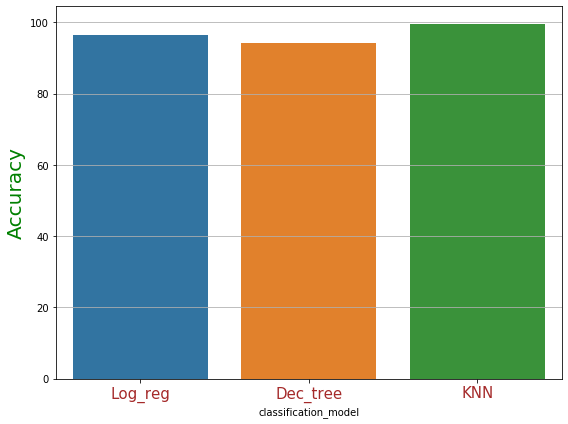

In [27]:
test_accuracy_df = pd.DataFrame({"classification_model": classification_model , "Accuracy" : accuracy })
# test_accuracy_df
plt.figure(figsize = (8 , 6 ))
plt.grid(True)
sns.barplot(x = "classification_model" , y = "Accuracy" , data = test_accuracy_df)
plt.xticks(color = "brown" , fontsize = 15 )
plt.ylabel("Accuracy" , color = "green" ,  fontsize = 20)
plt.tight_layout()
plt.savefig("first_ana1.png")
plt.show() 

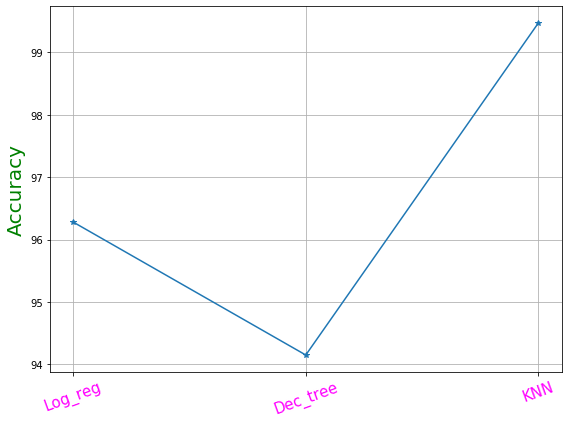

In [28]:
plt.figure(figsize = (8 , 6 ))
plt.grid(True)
plt.plot(classification_model , accuracy , marker = "*")
plt.ylabel("Accuracy" , color = "green" ,  fontsize = 20)
plt.xticks(color = "magenta" , fontsize = 15 , rotation = 20 )
plt.tight_layout()
plt.savefig("first_ana2.png")
plt.show()

# Part  2 
# SVM 
which is our main point of interest 

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 

In [30]:
kernels = ["linear" , "poly", "rbf" , "sigmoid"] 
C = [1 , 10 ,100 , 1000 ]
gamma = [1 , 0.1 , 0.01 , 0.001 ]
kernel_accuracy = [] 
kernel_f1_score = []
kernel_precision_score = [] 
kernel_recall_score = [] 

In [31]:
for kernel in kernels :
    param_grid = {"C" : C , "gamma" : gamma , "kernel" : [kernel]}
    grid = GridSearchCV(estimator = SVC() , param_grid= param_grid ,verbose = 4  )
    grid.fit(X_train , y_train )
    y_pred = grid.predict(X_test )
    kernel_accuracy.append(round(accuracy_score(y_test , y_pred) * 100  , 2 ))
    kernel_precision_score.append( round(precision_score(y_test , y_pred , average ='weighted') * 100 , 2 ))
    kernel_recall_score.append( round(recall_score(y_test , y_pred , average ='weighted') * 100 , 2 ))
    kernel_f1_score.append( round(f1_score(y_test , y_pred , average ='weighted') * 100 , 2 ))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 2/5] END .......C=1, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.961 total time=   0.0s
[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.961 total time=   0.0s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.961 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.987 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.987 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.961 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.961 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.961 total time=   0.0s
[CV 1/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.987 total time=   0.0s
[CV 2/5] END ....C=1, gamma=0.01, kernel=linear;

In [32]:
kernel_df = pd.DataFrame({"kernel_name" : kernels , "Accuracies" : kernel_accuracy , "Precision_score" : kernel_precision_score , 
             "Recall score" : kernel_recall_score , "f1 score" : kernel_f1_score })
kernel_df

,kernel_name,Accuracies,Precision_score,Recall score,f1 score
0,linear,95.74,95.91,95.74,95.78
1,poly,95.21,95.36,95.21,95.13
2,rbf,99.47,99.48,99.47,99.47
3,sigmoid,96.28,96.67,96.28,96.33


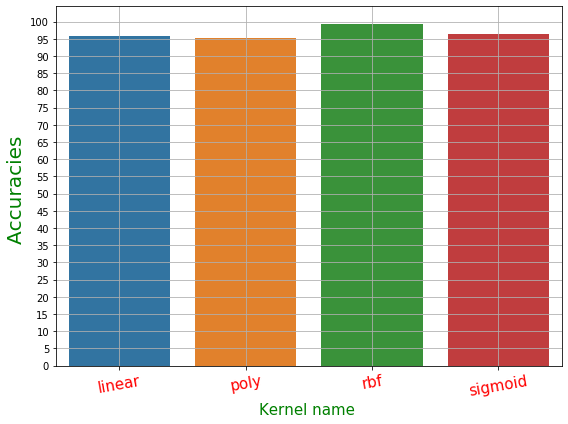

In [33]:
plt.figure(figsize = (8 , 6 ))
sns.barplot(x = "kernel_name" , y = "Accuracies" , data= kernel_df )
plt.grid(True)
plt.xlabel("Kernel name ", color = "green" , fontsize = 15  ) 
plt.ylabel("Accuracies ", color = "green" , fontsize = 20  ) 
plt.yticks(ticks = np.arange(0 ,105, 5 ) ,labels = np.arange(0 ,105 , 5 ))
plt.xticks(color = "red" , rotation = 10 , fontsize = 15 )
plt.tight_layout()
plt.savefig("first_ana3.png")
plt.show()

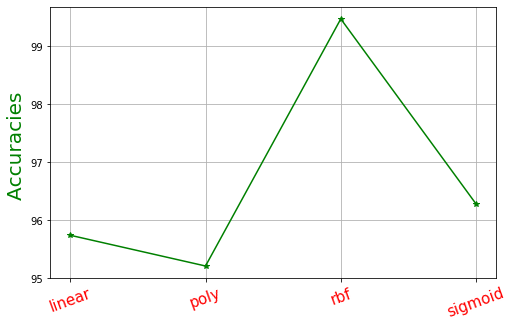

In [34]:
plt.figure(figsize = (8  ,5))
plt.plot(kernels,  kernel_accuracy , marker = "*" , color = "green" )
plt.grid(True)
plt.xticks(color = "red" , rotation = 20 , fontsize = 15 )
plt.ylabel("Accuracies ", color = "green" , fontsize = 20  )
# plt.tight_layout()
plt.savefig("first_ana4.png")
plt.show() 

# End of first analysis